In [21]:
import keras
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.utils import plot_model
from collections import Counter
from keras.callbacks import CSVLogger
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


Number of training examples: 50000
Number of testing examples: 10000
Number of classes: 10
Image shape: (32, 32, 3)
Image data type: uint8


<BarContainer object of 10 artists>

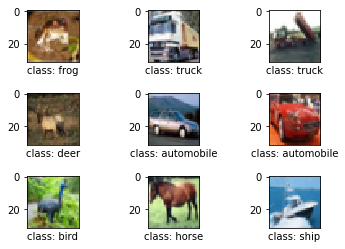

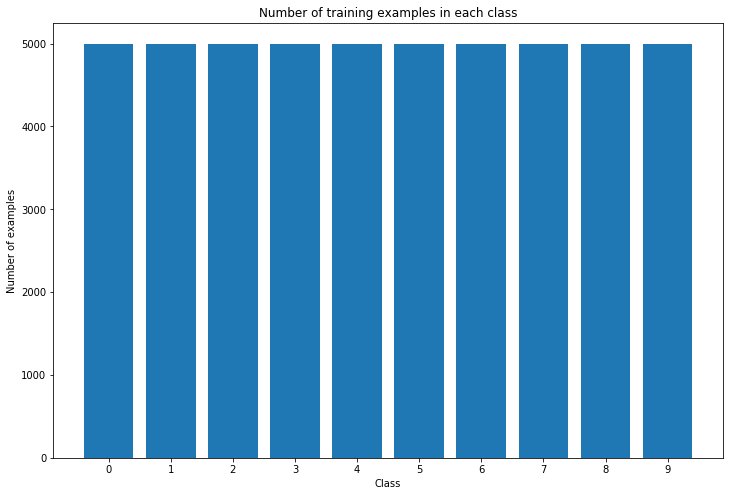

In [17]:
# Visualize
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

class_to_label =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(train_images[i])

    # Name of the true class.
    cls_true_name = class_to_label[train_labels[i][0]]
    xlabel = "class: {0}".format(cls_true_name)

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    
num_classes = np.unique(train_labels).shape[0]
print("Number of training examples:", train_images.shape[0])
print("Number of testing examples:", test_images.shape[0])
print("Number of classes:", num_classes)
print("Image shape:", train_images[0].shape)
print("Image data type:", train_images.dtype)
    
reshaped_labels = [class_num[0] for class_num in train_labels]
class_distribution = Counter(reshaped_labels)
x = range(10)
y = [class_distribution[cls] for cls in x]
plt.figure(figsize=(12,8))
plt.xticks(x)
plt.title("Number of training examples in each class")
plt.xlabel("Class")
plt.ylabel("Number of examples")
plt.bar(x, y)

In [18]:

num_classes = 10
# Convert class vectors to binary class matrices.
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [22]:
model.summary()
epochs = 40
name = 'simple'
if not os.path.isfile('{}.log'.format(str(name))) or not os.path.isfile('{}.h5'.format(str(name))):
    csv_logger = CSVLogger('{}.log'.format(str(name)), 
                           separator=',', 
                           append=False)
    model.fit(train_images, train_labels,
              batch_size=32,
              epochs=epochs,
              validation_split = 0.25,
              shuffle=True,
              callbacks = [csv_logger, early_stopping])
    # serialize weights to HDF5
    model.save_weights('{}.h5'.format(str(name)))
    print('Saved model to disk')
    history = model.history.history
else:
    log_data = pd.read_csv('{}.log'.format(str(name)), 
                           sep=',', 
                           engine='python')
    model.load_weights('{}.h5'.format(str(name)))
    print('Loaded model from disk')
    history = log_data

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                327690    
__________

ValueError: Error when checking target: expected activation_6 to have shape (10,) but got array with shape (1,)

In [ ]:
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(train_images, train_labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print(model.summary())